<a href="https://colab.research.google.com/github/HuynhDuyNhan/AI/blob/main/Banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
%cd "gdrive/MyDrive/AI/Banknotes"

/content/gdrive/MyDrive/AI/Banknotes


In [ ]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D,Dense
model=Sequential() 

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same' ,input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/AI/Banknotes/Train',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 635 images belonging to 10 classes.


In [ ]:
print(training_set.class_indices)

{'1.000': 0, '10.000': 1, '100.000': 2, '2.000': 3, '20.000': 4, '200.000': 5, '5.000': 6, '50.000': 7, '500': 8, '500.000': 9}


In [ ]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/AI/Banknotes/Test',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 350 images belonging to 10 classes.


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_set,epochs=50,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/50
20/20 [==============================] - 272s 14s/step - loss: 2.3046 - accuracy: 0.1606 - val_loss: 2.3801 - val_accuracy: 0.2057
Epoch 2/50
20/20 [==============================] - 160s 8s/step - loss: 1.9996 - accuracy: 0.2850 - val_loss: 2.1747 - val_accuracy: 0.1743
Epoch 3/50
20/20 [==============================] - 165s 8s/step - loss: 1.6668 - accuracy: 0.4173 - val_loss: 1.6396 - val_accuracy: 0.4429
Epoch 4/50
20/20 [==============================] - 162s 8s/step - loss: 1.2028 - accuracy: 0.5764 - val_loss: 1.2563 - val_accuracy: 0.5800
Epoch 5/50
20/20 [==============================] - 163s 8s/step - loss: 1.0164 - accuracy: 0.6630 - val_loss: 1.0818 - val_accuracy: 0.6371
Epoch 6/50
20/20 [==============================] - 162s 8s/step - loss: 0.6923 - accuracy: 0.7512 - val_loss: 0.9528 - val_accuracy: 0.6857
Epoch 7/50
20/20 [==============================] - 164s 8s/step - loss: 0.6174 - accuracy: 0.7906 - val_loss: 0.9276 - val_accuracy: 0.7314
Epoch 8/50
2

In [ ]:
from keras.models import load_model
model.save('Banknotes.h5')
model_CNN = load_model('Banknotes.h5')

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.08605343103408813
Train Accuracy 0.9700787663459778


<function matplotlib.pyplot.show>

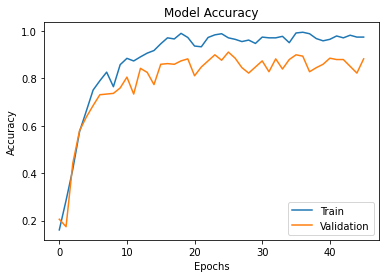

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

20.000


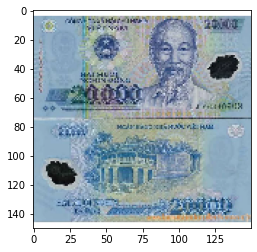

500


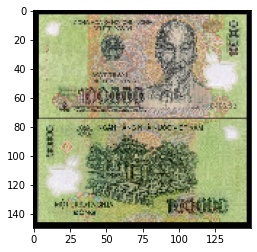

500


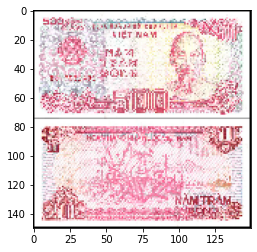

500


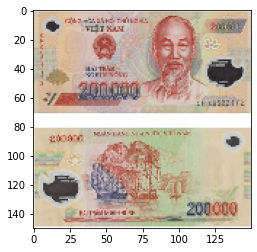

1.000


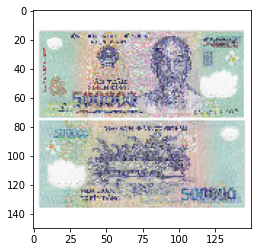

500


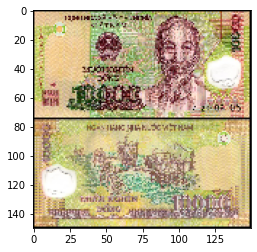

5.000


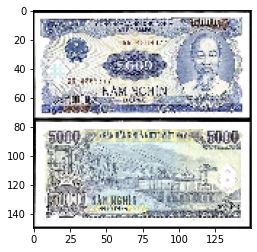

10.000


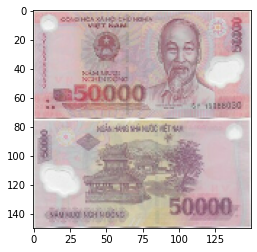

500


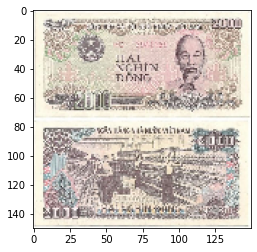

500


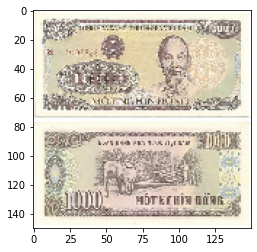

In [ ]:
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
test="/content/gdrive/MyDrive/AI/Banknotes/Validation/"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='1.000'
  if round(result[0][1])==1:
    prediction='10.000'
  if round(result[0][2])==1:
    prediction='100.000'
  if round(result[0][3])==1:
    prediction='2.000'
  if round(result[0][4])==1:
    prediction='20.000'
  if round(result[0][5])==1:
    prediction='200.000'
  if round(result[0][6])==1:
    prediction='5.000'
  if round(result[0][7])==1:
    prediction='50.000'
  if round(result[0][8])==1:
    prediction='500'
  if round(result[0][9])==1:
    prediction='500.000'
  print(prediction)
  plt.show()

In [6]:
pip install colab_pdf

ERROR: Could not find a version that satisfies the requirement colab_pdf (from versions: none)
ERROR: No matching distribution found for colab_pdf


In [1]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Banknotes')

Mounted at /content/drive
--2022-05-21 09:34:40--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-21 09:34:40 (25.8 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Banknotes to pdf
[NbConvertApp] Support files will be in Banknote_files/
[NbConvertApp] Making directory ./Banknote_files
[NbConvertApp] Making directory ./Banknote_files
[NbConvertApp] Making directory ./Banknote_files
[NbConvertApp] Making directory ./Banknote_files
[NbConvertA

'File Download Unsuccessful. Saved in Google Drive'